In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('python_practise/sales_data_with_discounts.csv')

In [6]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


### Descriptive Analytics for Numerical Columns

In [7]:
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_cols.tolist())

Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [8]:
mean_vals = df[numerical_cols].mean()
median_vals = df[numerical_cols].median()
mode_vals = df[numerical_cols].mode().iloc[0]
std_vals = df[numerical_cols].std()

summary = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Mode': mode_vals,
    'Standard Deviation': std_vals
})

print(summary)


                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


### BRIEF INTERPRETATION:
#### Mean shows the average value of each numerical column.
#### Median is useful to understand the central value, especially when the data is skewed.
#### Mode gives the most frequent value and is helpful for detecting repeated measurements.
#### Standard Deviation tells you how spread out the values are. A high std means the data varies a lot.

## Data Visualization


#### Histogram

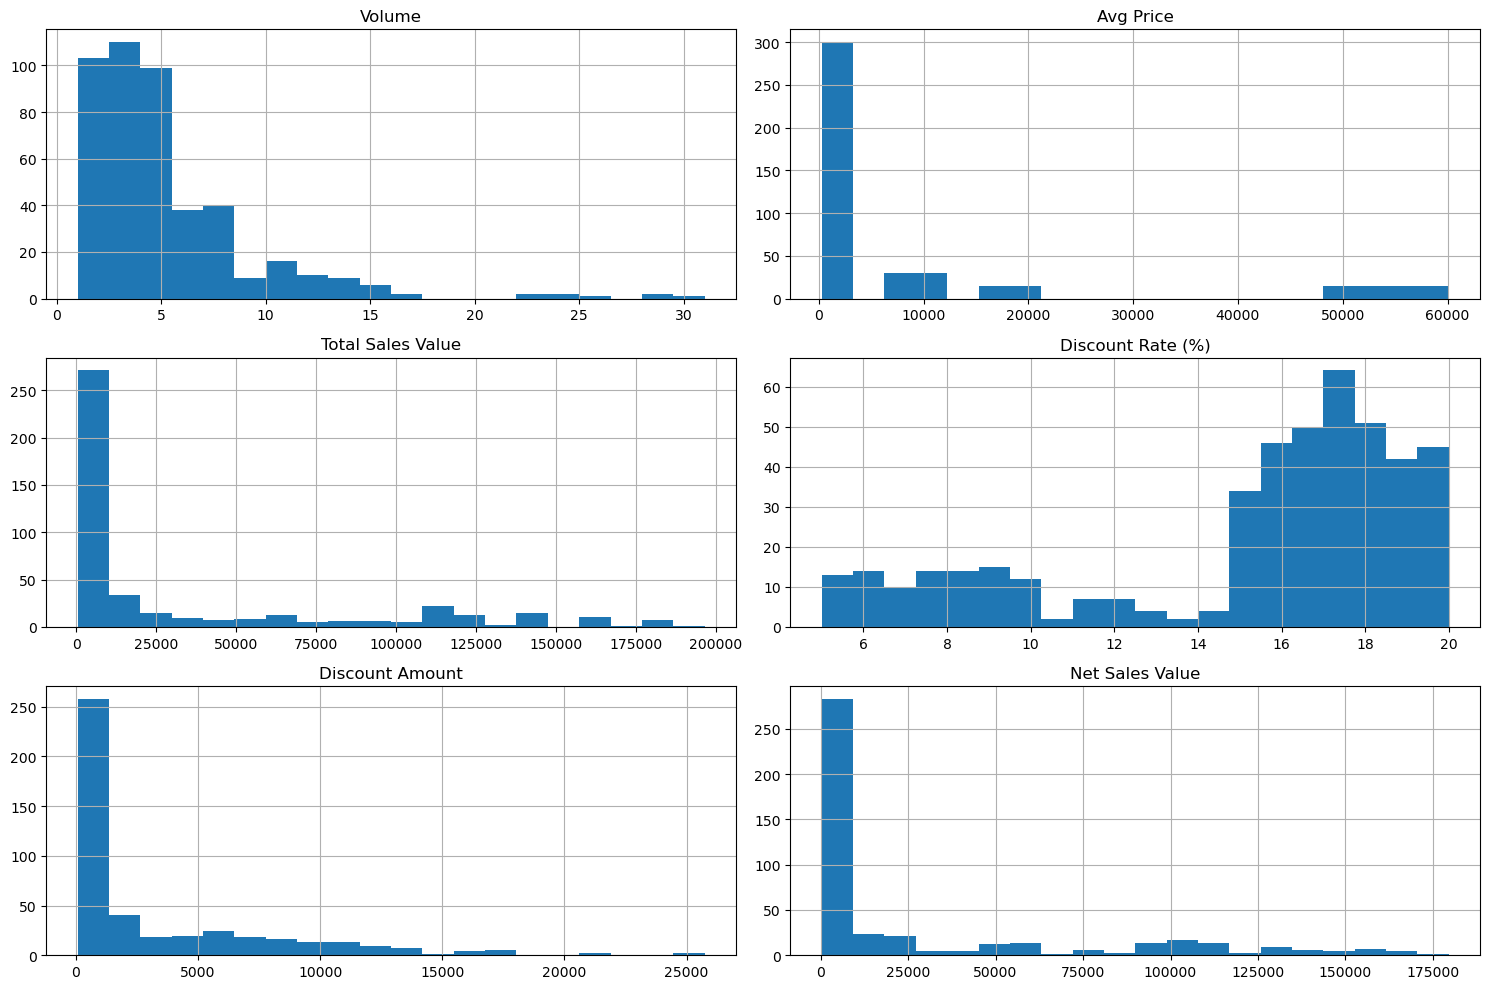

In [9]:
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

### Interpretation

#### A histogram is left-skewed (tail on the left), most values are high.

#### A right-skewed (tail on the right), most values are low.

#### A normal distribution looks like a bell curve.

#### Outliers show up as bars far from the main cluster.



### Box plots

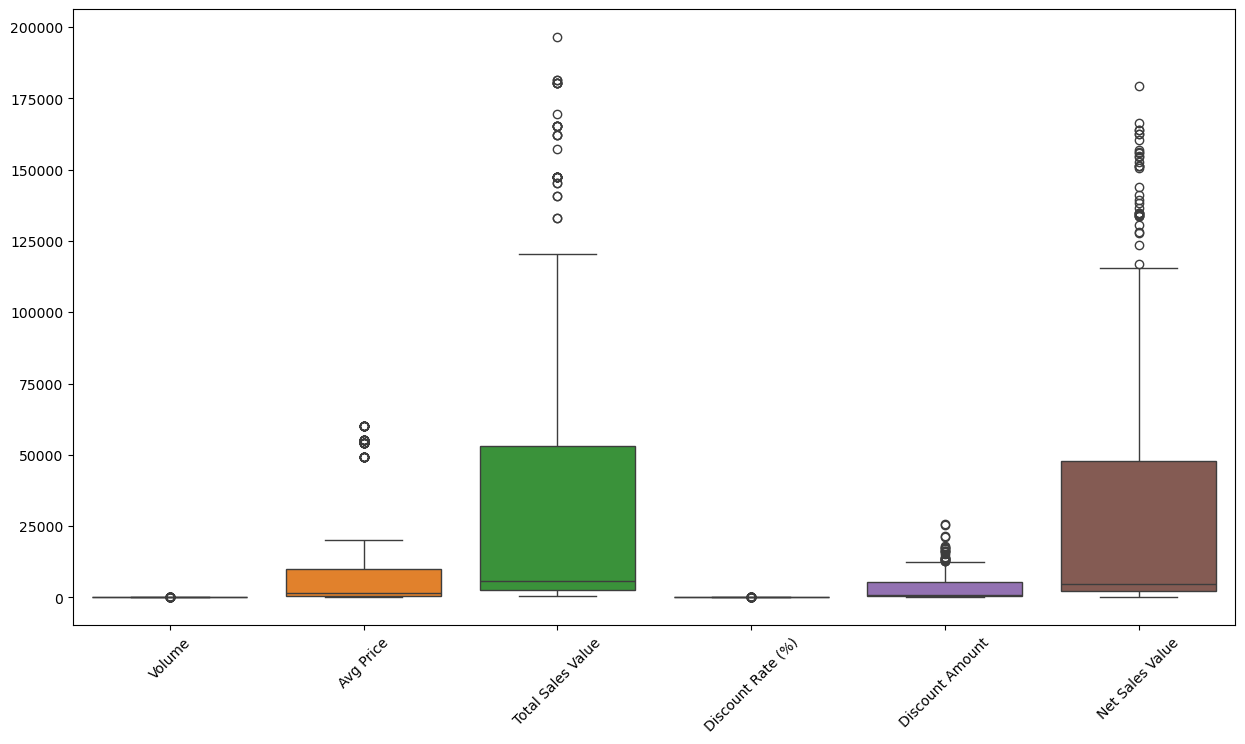

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.show()

#### Interpretation

#### Points outside the whiskers are considered outliers.

#### If the box is skewed to one side, it shows uneven distribution.

#### A wide IQR means more spread in the data; narrow IQR means values are closer.



### Bar Chart 

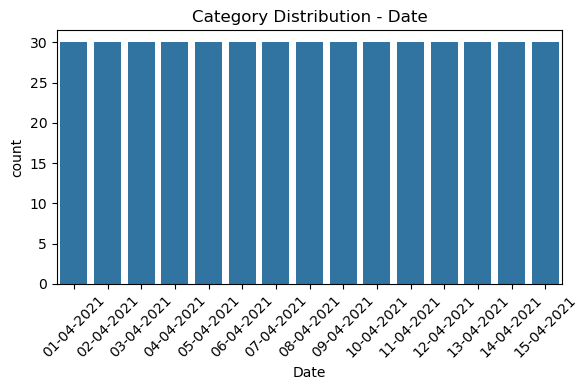

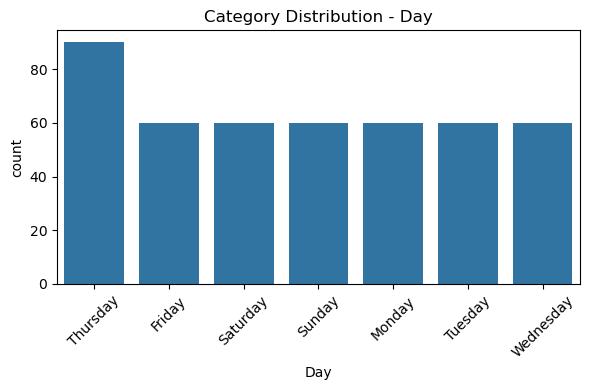

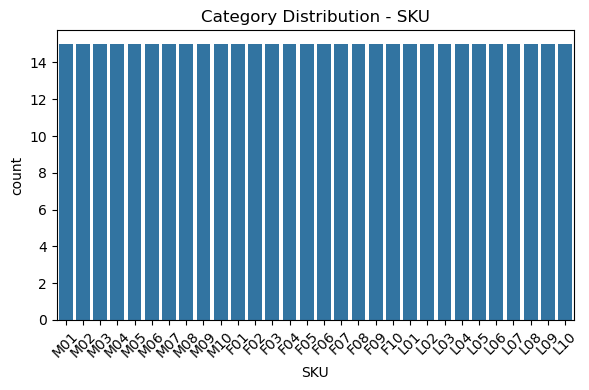

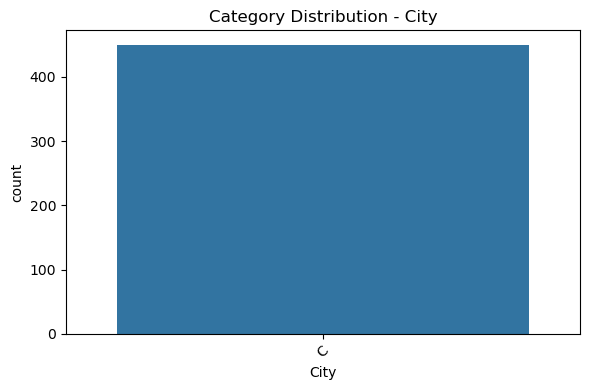

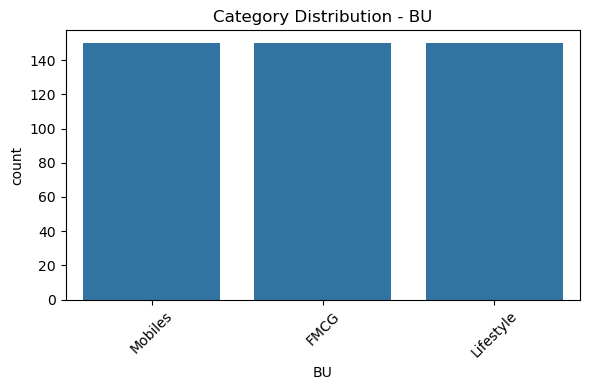

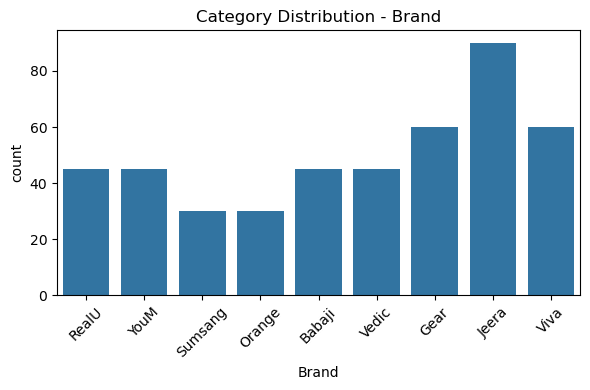

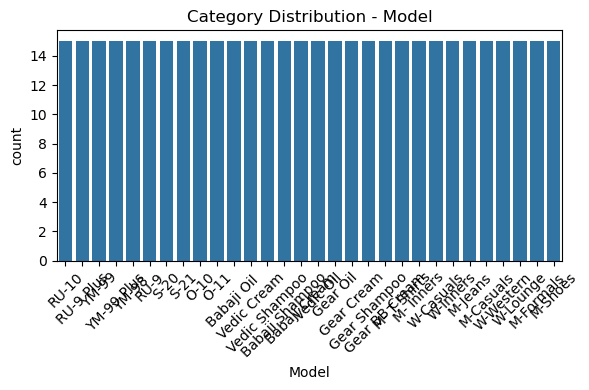

In [11]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Category Distribution - {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Standardization of Numerical Variables

 1. Explain the concept of standardization (z-score normalization):

Standardization is a preprocessing technique used to transform numerical features so they follow a standard normal distribution with:

Mean (μ) = 0

Standard deviation (σ) = 1

The formula for standardization (z-score normalization) is:

z = (x − μ) / σ

Where:

x = original value

μ = mean of the column

σ = standard deviation of the column

z = standardized value

 2. Standardize numerical columns using the formula z = (x - μ) / σ

In [12]:
num_cols = df.select_dtypes(include='number').columns
original_stats = df[num_cols].describe()
df_standardized = df.copy()
df_standardized[num_cols] = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()
standardized_stats = df_standardized[num_cols].describe()

print("Original Data Statistics:")
print(original_stats)

print("\nStandardized Data Statistics:")
print(standardized_stats)


Original Data Statistics:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427

3. Show before and after comparisons of the data distributions:

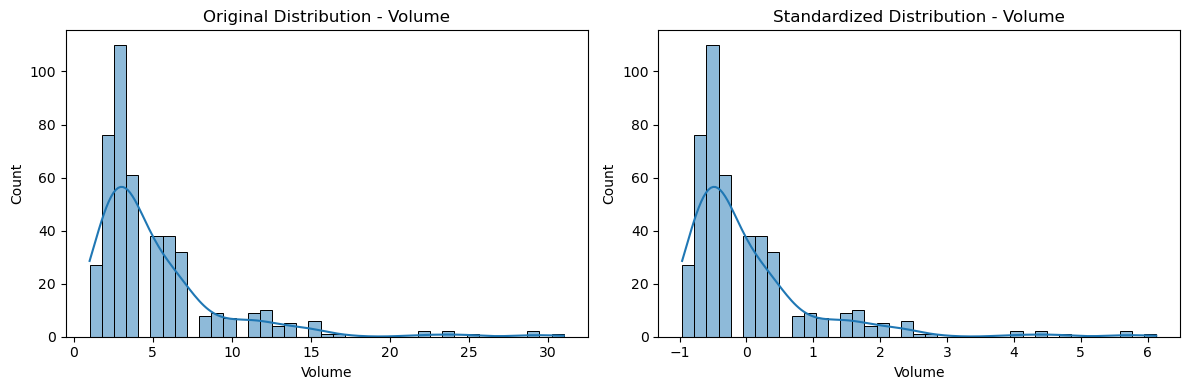

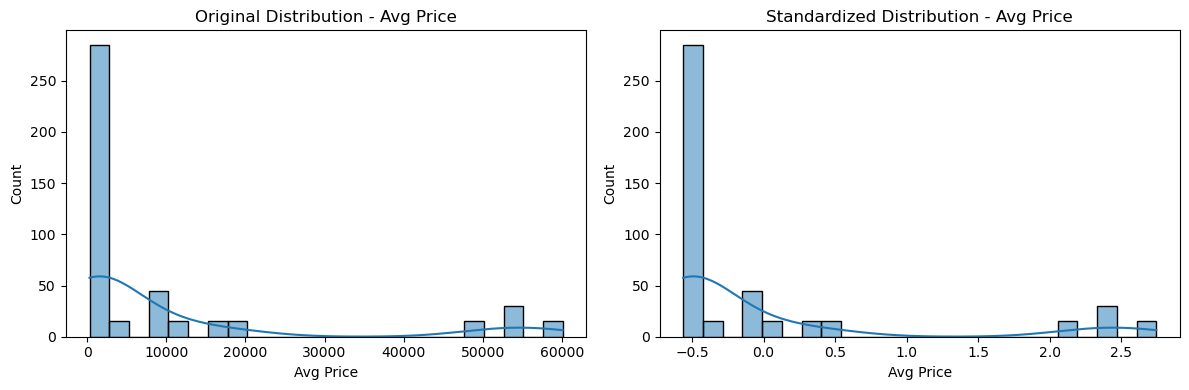

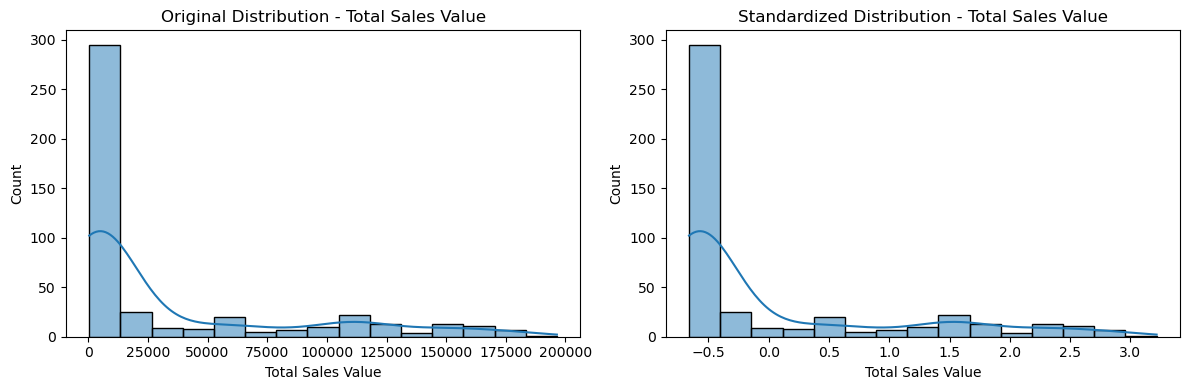

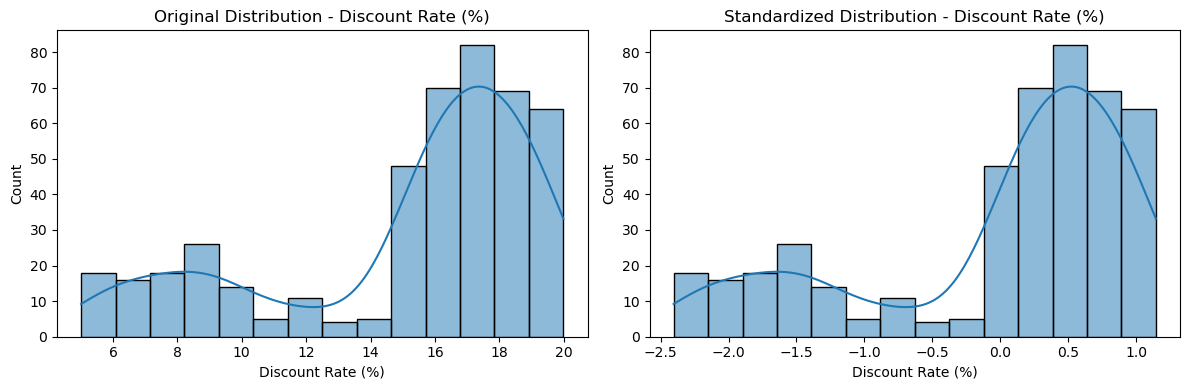

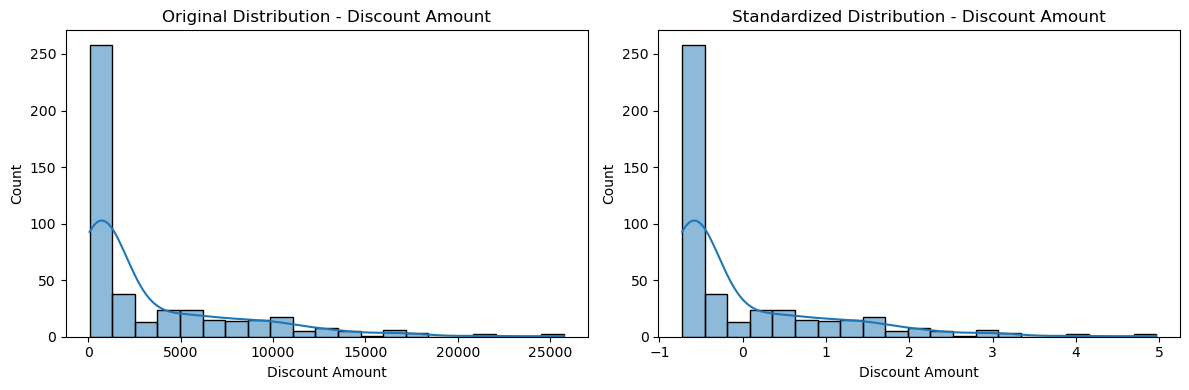

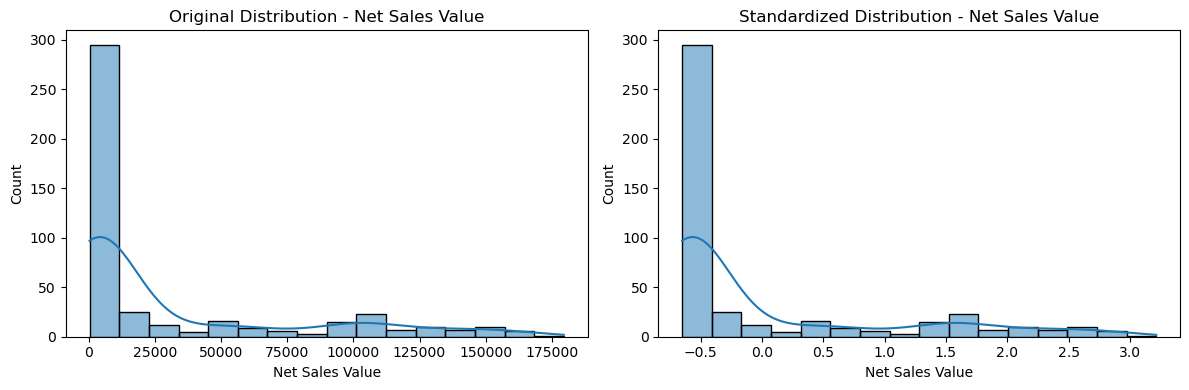

In [13]:
for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Original Distribution - {col}")
    plt.subplot(1, 2, 2)
    sns.histplot(df_standardized[col], kde=True)
    plt.title(f"Standardized Distribution - {col}")

    plt.tight_layout()
    plt.show()


### Conversion of Categorical Data into Dummy Variables


1. Conversion of Categorical Data into Dummy Variables
   
Objective: To transform categorical variables into a format that can be provided to ML algorithms.


for ex a column like:

| Color |
| ----- |
| Red   |
| Blue  |
| Green |

needs to be converted to:
| Color\_Blue | Color\_Green | Color\_Red |
| ----------- | ------------ | ---------- |
| 0           | 0            | 1          |
| 1           | 0            | 0          |
| 0           | 1            | 0          |




2. Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.


In [14]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols)
print(df_encoded.head())


df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

3. A portion of the transformed dataset.


In [15]:
df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
